<a href="https://colab.research.google.com/github/rijinbaby/Digit-classification-Kernel-Perceptron/blob/main/Digit_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit classification with the Kernel Perceptron**

---

[DATASET INFORMATION](https://www.kaggle.com/oddrationale/mnist-in-csv)

**TASK**: Implement the kernel Perceptron from scratch and run it to train 10 binary classifiers, one for each of the 10 digits (one-vs-all encoding), using the polynomial kernel

# **Dataset Overview**

MNIST Handwritten Digits dataset is used for this task. It contains images of digits taken
from a variety of scanned documents, normalized in size and centered. This makes it an
excellent dataset for evaluating models, allowing the developer to focus on the machine
learning with very little data cleaning or preparation required.
Each image is a 28 by 28 pixel square (784 pixels total). The dataset contains 60,000
images for model training and 10,000 images for the evaluation of the model.

The dataset consists of two files:

*   mnist_train.csv - contains 60,000 training examples and labels
*   mnist_test.csv - contains 10,000 test examples and labels

The first value in the dataset is the **label (a number from 0 to 9)** and the remaining 784 values are the **pixel values (a number from 0 to 255)**.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

# Run only for the first time -------
# !kaggle datasets download -d oddrationale/mnist-in-csv
# !unzip mnist-in-csv.zip

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd

mnist_train = pd.read_csv('mnist_train.csv', delimiter=',')
mnist_test = pd.read_csv('mnist_test.csv', delimiter=',')


In [ ]:
print(mnist_train.info())
# mnist_train.describe()
mnist_train.isnull().any().describe()  # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None


count       785
unique        1
top       False
freq        785
dtype: object

In [ ]:
mnist_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Dataset is pretty balanced!


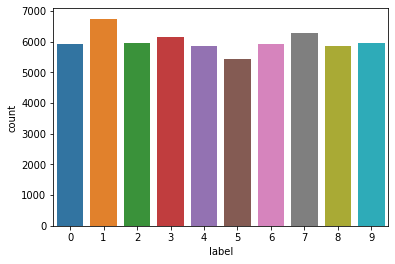

In [ ]:
import seaborn as sns
# Countplot for labels
sns.countplot(mnist_train['label'])
print("Dataset is pretty balanced!")

In [ ]:
print(mnist_test.info())
mnist_test.isnull().any().describe() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB
None


count       785
unique        1
top       False
freq        785
dtype: object

In [ ]:
mnist_test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The train and test sets contain 60,000 and 10,000 entries, respectively. Importantly, there are no missing data points. A quick glance at the first 5 entries of the train set show that 1/785 columns pertains to the label and the other 784/785 pertains to the pixels of the MNIST digit. Finally, the only datatype in the dataset is "int64".

Let's next visualize some of the MNIST digits.
https://www.kaggle.com/jeffguo1/mnist-beginner-multilayer-perceptron-mlp

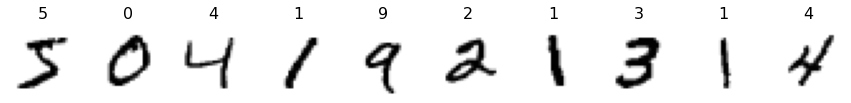

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# create a temporary DataFrame for visualization purposes
plot_ten_df = mnist_train.drop("label", axis=1).iloc[0:10, :]
plt.rcParams['figure.figsize'] = [15, 15]

# visualize the first 10 digits in the train set 
for index in range(10):
    plt.subplot(1, 10, index+1)
    # reshape pixel arragement to 28 x 28
    digit_array = np.asarray(plot_ten_df.iloc[index]).reshape(28, 28)
    plt.imshow(digit_array, cmap="binary")
    plt.title(mnist_train["label"].iloc[index], fontsize=16)
    plt.axis("off")

Examples of digits
Let's take a look at some of the samples for each digit.
https://www.kaggle.com/willcanniford/nmf-implementation-pattern-detection-in-digits

In [ ]:
data = pd.concat([mnist_train, mnist_test])

In [ ]:
# Create feature (X) and label (y) numpy arrays
X = np.array(data.loc[:, '1x1':])
y = np.array(data.loc[:, 'label'])

In [ ]:
# Useful to be able to pass an axes, as subplots enable view of many images
def plot_on_axes(sample, shape, ax):
    bitmap = sample.reshape(shape)
    ax.imshow(bitmap, cmap='gray', interpolation='nearest')

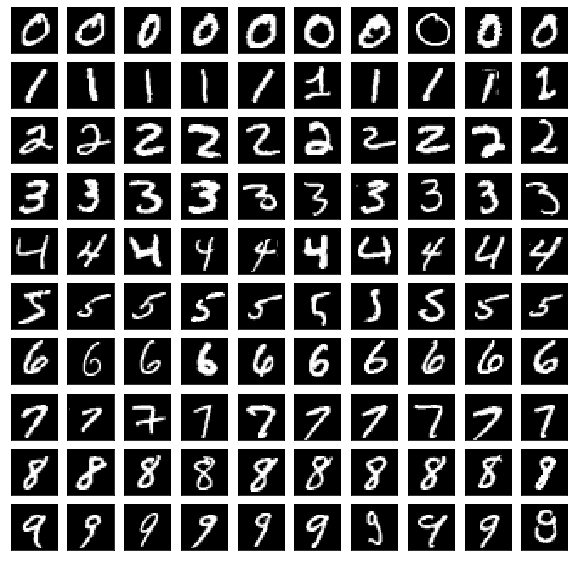

In [ ]:
n_examples = 10
fig, axes = plt.subplots(10, n_examples, figsize=(n_examples, 10))

for digit in np.arange(10):
    digit_indexes = np.where(y == digit)[0][:n_examples]
    
    for i, index in enumerate(digit_indexes): 
        plot_on_axes(X[index], (28, 28), axes[digit][i])
        axes[digit][i].get_xaxis().set_visible(False)
        axes[digit][i].get_yaxis().set_visible(False)
        
plt.show()



*   Perceptron - what -why

https://www.codingame.com/playgrounds/9487/deep-learning-from-scratch---theory-and-implementation/perceptrons

https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

*   kernel perceptron - what -why
https://github.com/simonEllershaw/KernelPerceptron

*   multiclass kernel perceptron
*   model

